In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

# From First Col to (last-1) col with all rows
X = df.iloc[:,:-1]

# last Col with all rows
y = df.iloc[:,-1]

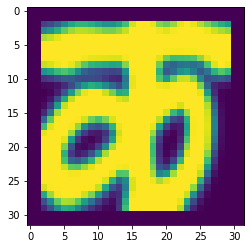

In [4]:
X_images = X.values.reshape(92000,32,32)
import matplotlib.pyplot as plt
plt.imshow(X_images[0])
plt.show()

In [3]:
# output in binary format for NN
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
y = binencoder.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size=0.20, random_state=92)
X_train = X_train/255
X_test = X_test/255

# changing from 3 to 4 dimensions of inputss
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')

In [9]:
# Building the Convolutional Model
# Building the Convolutional Model
conv_model = Sequential()
conv_model.add(
    Conv2D(32, (4, 4), 
           input_shape=(32, 32,1),
           activation='relu', 
           name="firstConv"
    )
)

conv_model.add(
    MaxPooling2D(pool_size=(2, 2), 
                 name="FirstPool"
                )
)

conv_model.add(
    Conv2D(64, (3, 3), 
           activation='relu', 
           name="SecondConv"
          )
)

conv_model.add(
    MaxPooling2D(
        pool_size=(2, 2),
        name="SecondPool")
)

conv_model.add(Dropout(0.2)) # Prevents Overfitting in Conv Nete
conv_model.add(Flatten())

conv_model.add(
    Dense(128,
          activation='relu',
          name="dense_1"
         )
)
conv_model.add(
    Dense(50, 
          activation='relu', 
          name="dense_2"
         )
)

# Output Layer with 46 Unique Outputs
conv_model.add(
    Dense(46, 
          activation='softmax', 
          name="modeloutput"
         )
)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
firstConv (Conv2D)           (None, 29, 29, 32)        544       
_________________________________________________________________
FirstPool (MaxPooling2D)     (None, 14, 14, 32)        0         
_________________________________________________________________
SecondConv (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
SecondPool (MaxPooling2D)    (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [10]:
conv_model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

                     
checkpoint = ModelCheckpoint("hindi_handwritting_detection.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)
callbacks = [earlystop, checkpoint]

In [17]:
result = conv_model.fit(X_train, y_train, validation_split=0.20, epochs=10, batch_size=92,verbose=2,callbacks = callbacks)

Epoch 1/10
640/640 - 4s - loss: 0.0391 - accuracy: 0.9867 - val_loss: 0.1146 - val_accuracy: 0.9691

Epoch 00001: val_loss improved from inf to 0.11456, saving model to hindi_handwritting_detection.h5
Epoch 2/10
640/640 - 4s - loss: 0.0362 - accuracy: 0.9877 - val_loss: 0.1162 - val_accuracy: 0.9702

Epoch 00002: val_loss did not improve from 0.11456
Epoch 3/10
640/640 - 4s - loss: 0.0326 - accuracy: 0.9892 - val_loss: 0.1278 - val_accuracy: 0.9691

Epoch 00003: val_loss did not improve from 0.11456
Epoch 4/10
640/640 - 4s - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.1139 - val_accuracy: 0.9723

Epoch 00004: val_loss improved from 0.11456 to 0.11385, saving model to hindi_handwritting_detection.h5
Epoch 5/10
640/640 - 4s - loss: 0.0280 - accuracy: 0.9901 - val_loss: 0.1225 - val_accuracy: 0.9702

Epoch 00005: val_loss did not improve from 0.11385
Epoch 6/10
640/640 - 4s - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.1178 - val_accuracy: 0.9718

Epoch 00006: val_loss did not improve

In [18]:
scores = conv_model.evaluate(X_test, y_test, verbose=0)

In [21]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.41%


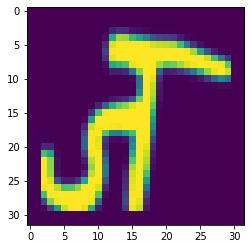

In [25]:
num = 15000
plt.imshow(X_images[num])
plt.show()


In [33]:
loss_train = result.history['loss']
loss_valid = result.history['val_loss']
acc_train = result.history['accuracy']
acc_valid = result.history['val_accuracy']

In [35]:
epochs = 10

In [26]:
#how to predict
imgTrans = X_images[num].reshape(1,32,32,1)
imgTrans.shape

predictions = conv_model.predict(imgTrans)
binencoder.classes_[np.argmax(predictions)]

'character_10_yna'